Dataset loaded successfully!

--- Model Accuracy Score ---
99.95%

--- Detailed Performance Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875


--- Top Business Drivers for Churn ---
             Feature  Importance
5      Payment Delay    0.436948
4      Support Calls    0.156691
2             Tenure    0.110662
3    Usage Frequency    0.088038
1             Gender    0.075394
7    Contract Length    0.041771
8        Total Spend    0.041748
0                Age    0.038913
9   Last Interaction    0.006685
6  Subscription Type    0.003150


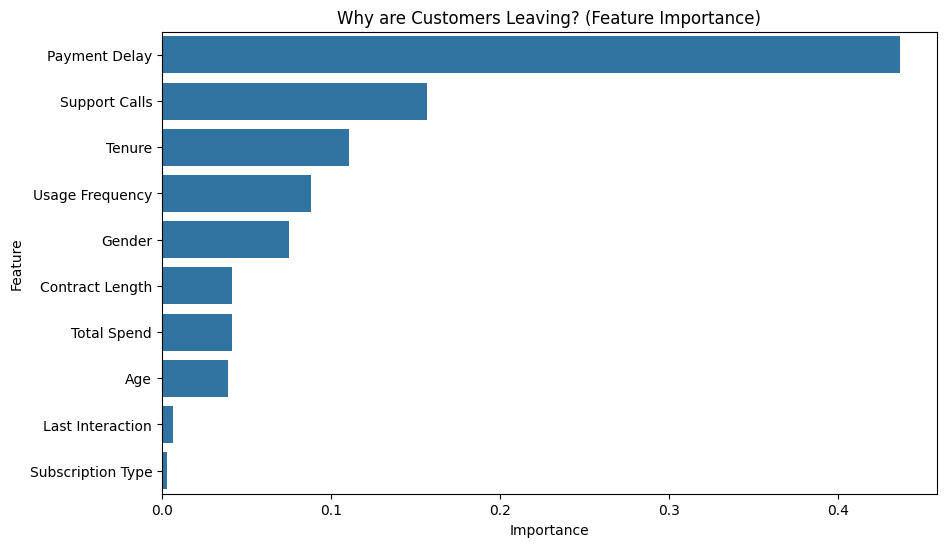

In [1]:
# ==========================================
# STEP 1: IMPORTING LIBRARIES (THE TOOLS)
# ==========================================
import pandas as pd             # For data manipulation (tables/DataFrames)
import numpy as np              # For mathematical operations
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns           # For advanced, beautiful visualizations
from sklearn.model_selection import train_test_split # To split data into training and testing
from sklearn.preprocessing import LabelEncoder, StandardScaler # To transform data for the model
from sklearn.ensemble import RandomForestClassifier # The machine learning "brain"
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # To check the score

# ==========================================
# STEP 2: LOADING THE DATA
# ==========================================
# We load the CSV file into a "DataFrame" (like a programmable Excel sheet)
try:
    df = pd.read_csv('customer_churn_dataset-testing-master.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The CSV file was not found. Make sure it's in the same folder as this script.")

# ==========================================
# STEP 3: DATA CLEANING (LOGIC: QUALITY CONTROL)
# ==========================================
# Logic: We drop 'CustomerID' because it's a random ID. 
# It doesn't help the model learn why people leave; it's just noise.
df = df.drop('CustomerID', axis=1)

# Logic: Remove any rows with missing data to prevent model errors.
df = df.dropna()

# ==========================================
# STEP 4: PRE-PROCESSING (LOGIC: TRANSLATION)
# ==========================================
# Machine learning models only speak "Numbers." We must translate words into numbers.

# Label Encoding: Converts "Male/Female" to 0/1, "Monthly/Annual" to 0/1/2, etc.
le = LabelEncoder()
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Splitting features (X) from the result we want to predict (y)
X = df.drop('Churn', axis=1) # All columns except Churn
y = df['Churn']              # Only the Churn column

# Train-Test Split: 
# We use 80% to train the model and keep 20% hidden to test it later.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling:
# 'Total Spend' is in hundreds, but 'Support Calls' is 0-10. 
# We scale them so the model doesn't think bigger numbers are more important.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==========================================
# STEP 5: MODELING (LOGIC: RANDOM FOREST)
# ==========================================
# Logic: We use Random Forest because it uses multiple 'Decision Trees' to 
# reach a consensus. It's much more accurate than a single tree.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ==========================================
# STEP 6: EVALUATION (LOGIC: THE REALITY CHECK)
# ==========================================
# We ask the model to predict churn for the hidden 20% of data (X_test)
y_pred = model.predict(X_test)

print("\n--- Model Accuracy Score ---")
print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\n--- Detailed Performance Report ---")
print(classification_report(y_test, y_pred))

# ==========================================
# STEP 7: BUSINESS INSIGHTS (LOGIC: THE 'SO WHAT?')
# ==========================================
# Logic: Which feature was most important in predicting churn?
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Top Business Drivers for Churn ---")
print(feature_importance_df)

# Visualizing the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Why are Customers Leaving? (Feature Importance)')
plt.show()